In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

In [22]:

np.random.seed(23) 

mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# represents a covariance matrix where all the variances are 1 (variance of each feature is 1),
# and all the covariances are 0 (meaning there is no correlation between any pair of features).
# This is often referred to as an identity covariance matrix and indicates that each feature is 
# uncorrelated and has a variance of 1.

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)


C:\Users\arups\AppData\Local\Temp\ipykernel_12460\3382242354.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class1_sample , hist = False)


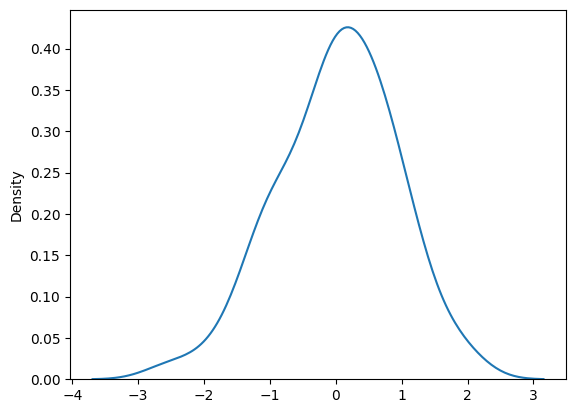

In [14]:
sns.distplot(class1_sample , hist = False)
plt.show()


In [19]:
print(np.eye(3 , dtype = int))
print(np.zeros((3,3) , dtype = int))

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [25]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [52]:
plt.figure(figsize = (16,16))
fig = px.scatter_3d(df , x = df['feature1'] , y = df['feature2'] , z = df['feature3'] ,color = df['target'].astype('str'))
fig.update_traces(marker = dict(size = 12,
                               line = dict(width = 2, color = 'DarkSlateGrey')),
                               selector = dict(mode = 'markers')
                 )

# selector=dict(mode='markers') ensures that the marker-specific properties (e.g., size and line properties)
# are only applied to the markers in the 3D scatter plot, leaving other traces (if any) unaffected.

dark_template = go.layout.Template(
    layout=dict(
        paper_bgcolor='black',
        plot_bgcolor='black',
    )
)

# Set the template for the figure
fig.update_layout(template=dark_template)
fig.show()

<Figure size 1600x1600 with 0 Axes>

In [54]:
# Step = 1 : Applying Standard Scaler
scaler = StandardScaler()
df.iloc[: , 0:3] = scaler.fit_transform(df.iloc[: , 0:3])

In [55]:
# Step = 2: Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0] , df.iloc[:,1] , df.iloc[:,2]])
print('Covariance Matrix is,\n' , covariance_matrix)

Covariance Matrix is,
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [56]:
# Step = 3:Finding Eigen values and Eigen Vectors
eigen_values , eigen_vectors = np.linalg.eig(covariance_matrix)

In [57]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [58]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

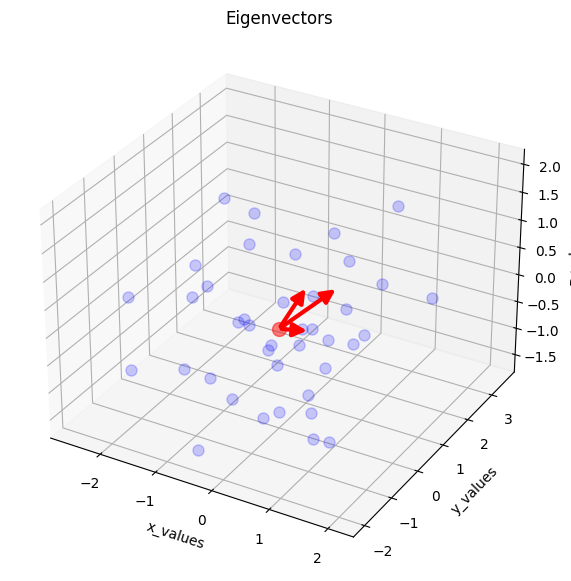

In [63]:

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

(-0.1, 1.1)

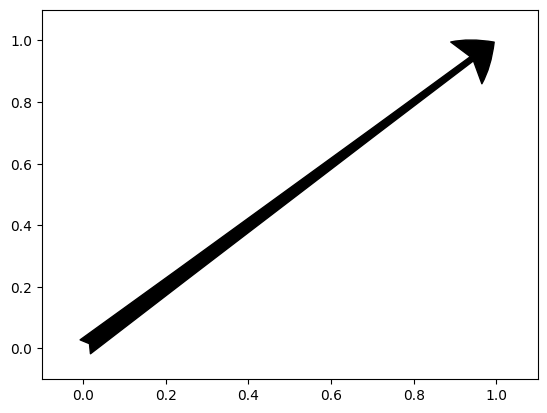

In [67]:
from matplotlib.patches import FancyArrowPatch, ArrowStyle
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
style = ArrowStyle('Fancy', head_length=1, head_width=1.5, tail_width=0.5)
arrow = FancyArrowPatch((0, 0), (1, 1), mutation_scale=25, arrowstyle=style, color='k')                     
ax.add_patch(arrow)

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)